In [1]:
!pip install pandas seaborn matplotlib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [27]:
import pandas as pd

# Cargar el CSV en un DataFrame
df = pd.read_csv('/kaggle/input/sol4hfinal/resultadosSOL4HFinal.csv')

# Mostrar las primeras filas para verificar
df.head()


,name,Activar Absolute Strength (Histograma),Activar SSL Channel,Activar RSI,Activar Squeeze Momentum,Activar MACD Signal,Activar MACD Histograma,Activar Condiciones MTF,Activar Condiciones EMAs,Activar Distancia entre EMAs,Activar Distancia Valida StopLoss,Usar Firestorm,Activar WaveTrend Reversal,Activar WaveTrend Divergence,Activar Divergencia,Porcentaje de toma de ganancias,Multiplier for Take Profit,Número de Indicadores Opcionales requeridos,Beneficio neto,Total operaciones cerradas,Porcentaje de rentabilidad,Factor de ganancias,Prom. barras en operaciones
0,combination_10,Desactivado,Opcional,Opcional,Excluyente,Desactivado,Opcional,Opcional,Opcional,Opcional,Opcional,Opcional,Desactivado,Desactivado,Opcional,25,0.55,5,6898.24,552.0,59.42,1.116,14.0
1,combination_100,Opcional,Excluyente,Desactivado,Opcional,Opcional,Desactivado,Desactivado,Opcional,Opcional,Opcional,Desactivado,Opcional,Desactivado,Opcional,25,0.55,6,507.95,109.0,53.21,1.066,9.0
2,combination_1000,Opcional,Opcional,Opcional,Excluyente,Opcional,Opcional,Opcional,Opcional,Opcional,Opcional,Desactivado,Opcional,Desactivado,Desactivado,25,0.55,6,6405.77,520.0,57.50,1.118,14.0
3,combination_10000,Opcional,Excluyente,Opcional,Opcional,Desactivado,Opcional,Opcional,Opcional,Desactivado,Desactivado,Opcional,Desactivado,Opcional,Opcional,25,0.55,7,8906.96,388.0,59.28,1.225,15.0
4,combination_100000,Excluyente,Opcional,Opcional,Desactivado,Opcional,Opcional,Opcional,Desactivado,Desactivado,Desactivado,Desactivado,Opcional,Desactivado,Opcional,25,0.55,5,14561.87,403.0,61.04,1.399,14.0


# Eficacia de indicadores

# a. Eficacia Indicadores en estado Opcional


In [3]:
# Definir las columnas de 'result'
result_columns = [
    'Beneficio neto',
    'Total operaciones cerradas',
    'Porcentaje de rentabilidad',
    'Factor de ganancias',
    'Prom. barras en operaciones'
]

# Filtrar filas donde al menos una de las columnas de 'result' es NaN
df_valid = df.dropna(subset=result_columns)

# Verificar el filtrado
print(f"Total de combinaciones antes del filtrado: {df.shape[0]}")
print(f"Total de combinaciones después del filtrado: {df_valid.shape[0]}")


Total de combinaciones antes del filtrado: 134200
Total de combinaciones después del filtrado: 131911


In [4]:
indicator_columns = [
    'Activar Absolute Strength (Histograma)',
    'Activar SSL Channel',
    'Activar RSI',
    'Activar Squeeze Momentum',
    'Activar MACD Signal',
    'Activar MACD Histograma',
    'Activar Condiciones MTF',
    'Activar Condiciones EMAs',
    'Activar Distancia entre EMAs',
    'Activar Distancia Valida StopLoss',
    'Usar Firestorm',
    'Activar WaveTrend Reversal',
    'Activar WaveTrend Divergence',
    'Activar Divergencia'
]


In [5]:
# Inicializar un diccionario para almacenar los promedios
beneficio_promedio = {}

for indicador in indicator_columns:
    # Filtrar filas donde el indicador está en estado 'Opcional'
    df_opcional = df_valid[df_valid[indicador] == 'Opcional']
    
    # Calcular el promedio de 'Beneficio neto'
    promedio = df_opcional['Beneficio neto'].mean()
    
    # Almacenar en el diccionario
    beneficio_promedio[indicador] = promedio

# Convertir el diccionario en un DataFrame para facilitar la visualización
df_beneficio_promedio = pd.DataFrame.from_dict(beneficio_promedio, orient='index', columns=['Beneficio Neto Promedio (USD)'])
df_beneficio_promedio = df_beneficio_promedio.sort_values(by='Beneficio Neto Promedio (USD)', ascending=False)

# Mostrar el DataFrame resultante
print(df_beneficio_promedio)


                                        Beneficio Neto Promedio (USD)
Activar Squeeze Momentum                                  9857.491897
Activar SSL Channel                                       9810.272150
Activar MACD Signal                                       9798.030919
Activar Absolute Strength (Histograma)                    9749.446643
Activar RSI                                               9670.224325
Activar Condiciones MTF                                   9621.367793
Usar Firestorm                                            9564.281855
Activar MACD Histograma                                   9454.938051
Activar Condiciones EMAs                                  9269.220736
Activar Distancia entre EMAs                              7903.138210
Activar WaveTrend Divergence                              7150.476732
Activar WaveTrend Reversal                                6878.460909
Activar Distancia Valida StopLoss                         6766.150024
Activar Divergencia 

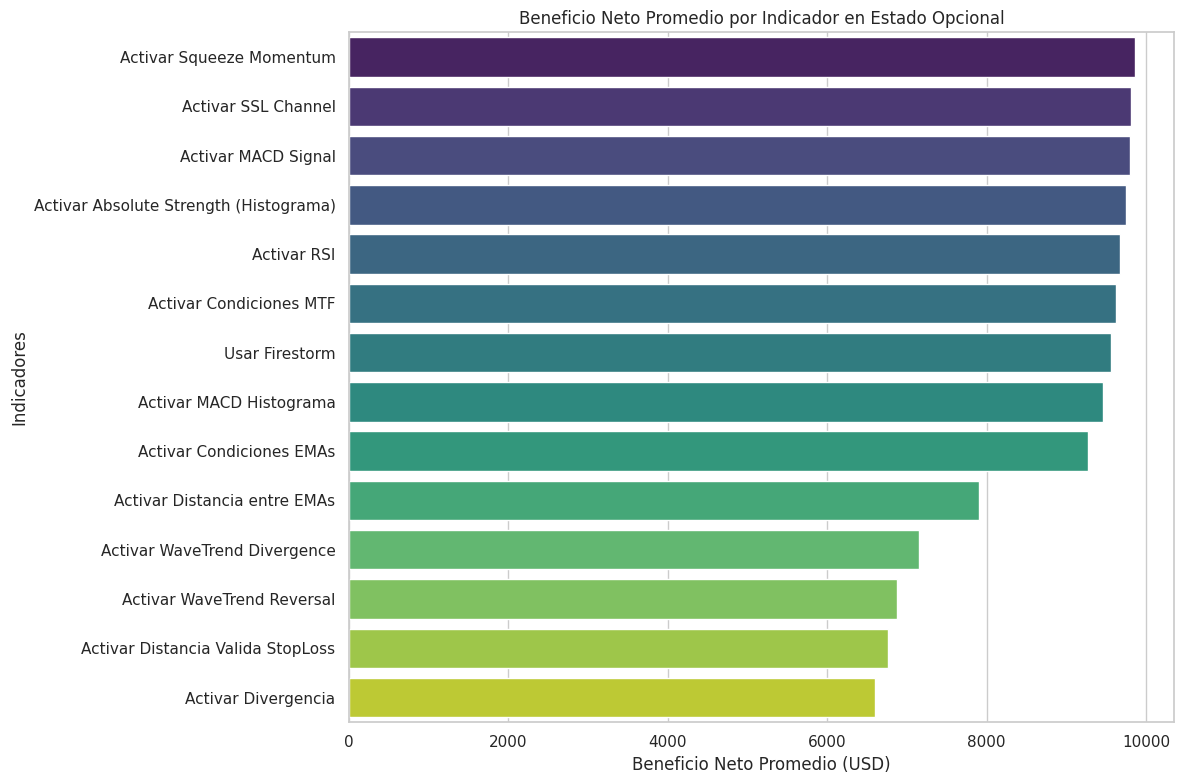

In [6]:
# Configurar el estilo de los gráficos
sns.set(style="whitegrid")

# Crear un gráfico de barras para visualizar el beneficio neto promedio
plt.figure(figsize=(12, 8))
sns.barplot(
    x='Beneficio Neto Promedio (USD)', 
    y=df_beneficio_promedio.index, 
    data=df_beneficio_promedio, 
    palette='viridis'
)
plt.title('Beneficio Neto Promedio por Indicador en Estado Opcional')
plt.xlabel('Beneficio Neto Promedio (USD)')
plt.ylabel('Indicadores')
plt.tight_layout()
plt.show()


                                        Entropía Combinaciones  \
Usar Firestorm                                       13.111982   
Activar MACD Histograma                              13.111568   
Activar WaveTrend Divergence                         13.109130   
Activar Divergencia                                  13.104316   
Activar MACD Signal                                  13.103997   
Activar Distancia entre EMAs                         13.103420   
Activar RSI                                          13.102544   
Activar Condiciones EMAs                             13.097220   
Activar WaveTrend Reversal                           13.082678   
Activar Distancia Valida StopLoss                    13.078386   
Activar SSL Channel                                  12.695364   
Activar Absolute Strength (Histograma)               12.692513   
Activar Squeeze Momentum                             12.679451   
Activar Condiciones MTF                              12.672764   

         

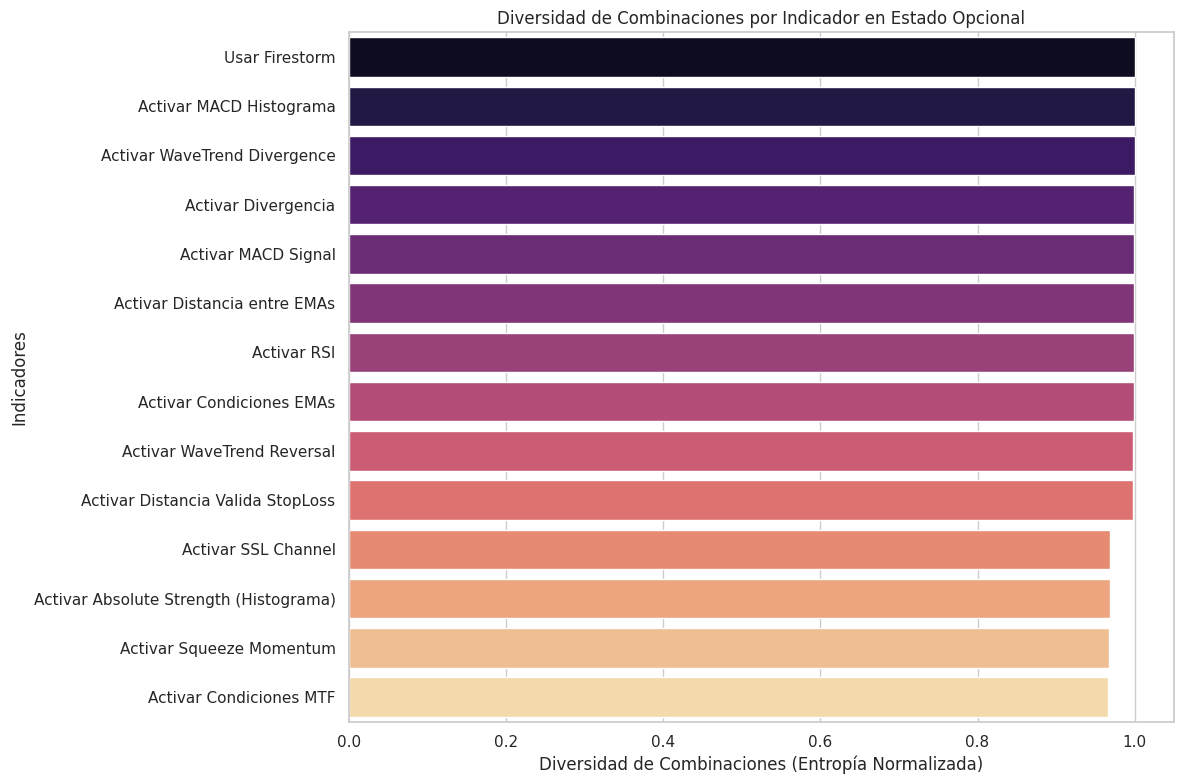

/tmp/ipykernel_37/3204633730.py:72: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_efficacy['Entropía Combinaciones (Normalizada)'].fillna(0, inplace=True)


                                        Beneficio Neto Promedio (USD)  \
Activar MACD Signal                                       9798.030919   
Activar RSI                                               9670.224325   
Usar Firestorm                                            9564.281855   
Activar MACD Histograma                                   9454.938051   
Activar Condiciones EMAs                                  9269.220736   
Activar Distancia entre EMAs                              7903.138210   
Activar WaveTrend Divergence                              7150.476732   
Activar SSL Channel                                       9810.272150   
Activar WaveTrend Reversal                                6878.460909   
Activar Squeeze Momentum                                  9857.491897   
Activar Absolute Strength (Histograma)                    9749.446643   
Activar Divergencia                                       6606.246474   
Activar Distancia Valida StopLoss                  

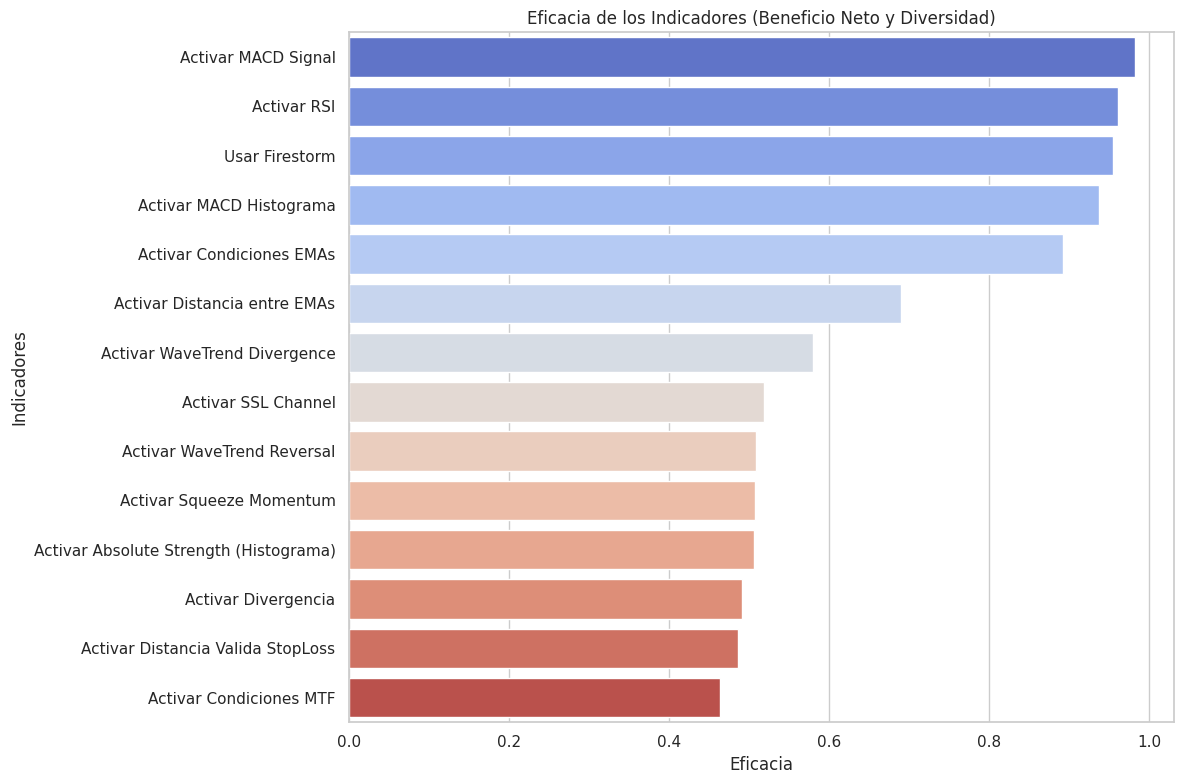

In [7]:
# Definir el mapeo de estados a valores numéricos
estado_mapping = {
    'Desactivado': 0,
    'Opcional': 1,
    'Excluyente': 2
}


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from math import log2  # Importa la función log2
from sklearn.preprocessing import MinMaxScaler

# 3. Calcular la Diversidad (Entropía) de las Combinaciones por Indicador en Estado Opcional
diversidad_combinaciones = {}

for indicador in indicator_columns:
    # Filtrar filas donde el indicador está en estado 'Opcional'
    df_opcional = df_valid[df_valid[indicador] == 'Opcional'].copy()
    
    # Excluir el indicador actual para evaluar la diversidad de los demás
    other_indicators = [col for col in indicator_columns if col != indicador]
    
    # Crear una representación única de la configuración de los otros indicadores
    combinaciones_unicas = df_opcional[other_indicators].astype(str).agg('|'.join, axis=1)
    
    # Calcular la frecuencia de cada configuración única
    combinacion_counts = combinaciones_unicas.value_counts()
    
    # Calcular la probabilidad de cada configuración
    prob_dist = combinacion_counts / combinacion_counts.sum()
    
    # Calcular la entropía
    entropy = -sum(prob_dist * prob_dist.apply(lambda x: log2(x) if x > 0 else 0))
    
    # Almacenar la entropía
    diversidad_combinaciones[indicador] = entropy

# Convertir el diccionario en un DataFrame
df_diversidad = pd.DataFrame.from_dict(
    diversidad_combinaciones, 
    orient='index', 
    columns=['Entropía Combinaciones']
).sort_values(by='Entropía Combinaciones', ascending=False)

# Normalizar la entropía para que esté en el rango [0, 1]
df_diversidad['Entropía Combinaciones (Normalizada)'] = df_diversidad['Entropía Combinaciones'] / df_diversidad['Entropía Combinaciones'].max()

# Mostrar el DataFrame resultante
print(df_diversidad)

# Visualizar la Diversidad de las Combinaciones
plt.figure(figsize=(12, 8))
sns.barplot(
    x='Entropía Combinaciones (Normalizada)', 
    y=df_diversidad.index, 
    data=df_diversidad, 
    palette='magma'
)
plt.title('Diversidad de Combinaciones por Indicador en Estado Opcional')
plt.xlabel('Diversidad de Combinaciones (Entropía Normalizada)')
plt.ylabel('Indicadores')
plt.tight_layout()
plt.show()

# 4. Combinar Beneficio Neto Promedio y Diversidad para Medir la Eficacia
# Combinar los DataFrames de beneficio y diversidad
df_efficacy = pd.concat([df_beneficio_promedio, df_diversidad['Entropía Combinaciones (Normalizada)']], axis=1)

# Reemplazar NaN en 'Entropía Combinaciones (Normalizada)' con 0
df_efficacy['Entropía Combinaciones (Normalizada)'].fillna(0, inplace=True)

# Normalizar las columnas para combinarlas equitativamente
scaler = MinMaxScaler()

df_efficacy['Beneficio Neto Promedio (Norm)'] = scaler.fit_transform(df_efficacy[['Beneficio Neto Promedio (USD)']])
df_efficacy['Entropía Combinaciones (Norm)'] = scaler.fit_transform(df_efficacy[['Entropía Combinaciones (Normalizada)']])

# Definir la eficacia como el promedio de las métricas normalizadas
df_efficacy['Eficacia'] = (df_efficacy['Beneficio Neto Promedio (Norm)'] + df_efficacy['Entropía Combinaciones (Norm)']) / 2

# Ordenar por eficacia
df_efficacy = df_efficacy.sort_values(by='Eficacia', ascending=False)

# Mostrar el DataFrame con la eficacia
print(df_efficacy[['Beneficio Neto Promedio (USD)', 'Beneficio Neto Promedio (Norm)', 
                   'Entropía Combinaciones (Normalizada)', 'Entropía Combinaciones (Norm)', 
                   'Eficacia']])

# Visualizar la Eficacia de los Indicadores
plt.figure(figsize=(12, 8))
sns.barplot(
    x='Eficacia', 
    y=df_efficacy.index, 
    data=df_efficacy, 
    palette='coolwarm'
)
plt.title('Eficacia de los Indicadores (Beneficio Neto y Diversidad)')
plt.xlabel('Eficacia')
plt.ylabel('Indicadores')
plt.tight_layout()
plt.show()



In [8]:
# Calcular el número de configuraciones únicas
diversidad_combinaciones_unique = {}

for indicador in indicator_columns:
    df_opcional = df_valid[df_valid[indicador] == 'Opcional'].copy()
    other_indicators = [col for col in indicator_columns if col != indicador]
    combinaciones_unicas = df_opcional[other_indicators].astype(str).agg('|'.join, axis=1)
    unique_count = combinaciones_unicas.nunique()
    diversidad_combinaciones_unique[indicador] = unique_count

df_diversidad_unique = pd.DataFrame.from_dict(
    diversidad_combinaciones_unique, 
    orient='index', 
    columns=['Número de Configuraciones Únicas']
).sort_values(by='Número de Configuraciones Únicas', ascending=False)

print(df_diversidad_unique)


                                        Número de Configuraciones Únicas
Usar Firestorm                                                      9431
Activar MACD Histograma                                             9430
Activar WaveTrend Divergence                                        9412
Activar Divergencia                                                 9389
Activar MACD Signal                                                 9374
Activar Distancia entre EMAs                                        9370
Activar RSI                                                         9366
Activar Condiciones EMAs                                            9334
Activar WaveTrend Reversal                                          9252
Activar Distancia Valida StopLoss                                   9220
Activar SSL Channel                                                 7071
Activar Absolute Strength (Histograma)                              7048
Activar Squeeze Momentum                           

                                        Beneficio Neto Promedio (USD)  \
Activar MACD Signal                                       9798.030919   
Activar RSI                                               9670.224325   
Usar Firestorm                                            9564.281855   
Activar MACD Histograma                                   9454.938051   
Activar Condiciones EMAs                                  9269.220736   
Activar SSL Channel                                       9810.272150   
Activar Squeeze Momentum                                  9857.491897   
Activar Absolute Strength (Histograma)                    9749.446643   
Activar Condiciones MTF                                   9621.367793   
Activar Distancia entre EMAs                              7903.138210   
Activar WaveTrend Divergence                              7150.476732   
Activar WaveTrend Reversal                                6878.460909   
Activar Distancia Valida StopLoss                  

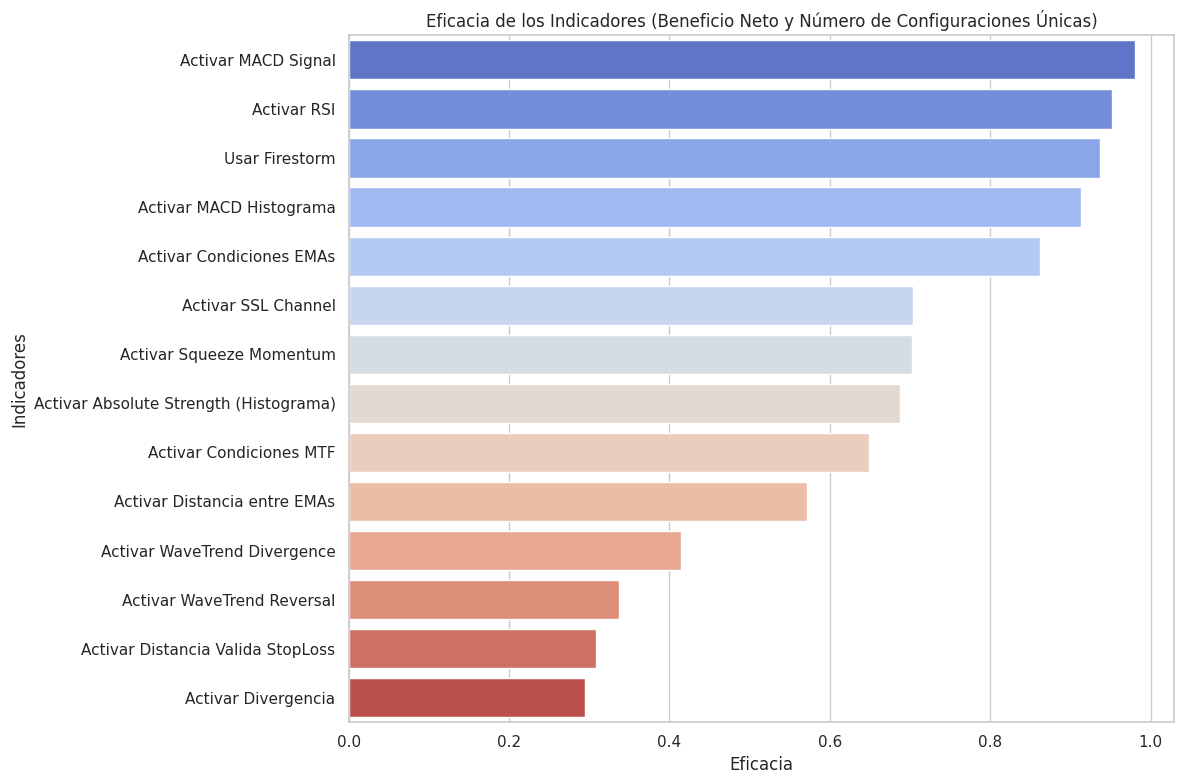

/tmp/ipykernel_37/116809434.py:127: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_efficacy_entropy['Entropía Combinaciones (Normalizada)'].fillna(0, inplace=True)


                                        Beneficio Neto Promedio (USD)  \
Activar MACD Signal                                       9798.030919   
Activar RSI                                               9670.224325   
Usar Firestorm                                            9564.281855   
Activar MACD Histograma                                   9454.938051   
Activar Condiciones EMAs                                  9269.220736   
Activar SSL Channel                                       9810.272150   
Activar Squeeze Momentum                                  9857.491897   
Activar Absolute Strength (Histograma)                    9749.446643   
Activar Condiciones MTF                                   9621.367793   
Activar Distancia entre EMAs                              7903.138210   
Activar WaveTrend Divergence                              7150.476732   
Activar WaveTrend Reversal                                6878.460909   
Activar Distancia Valida StopLoss                  

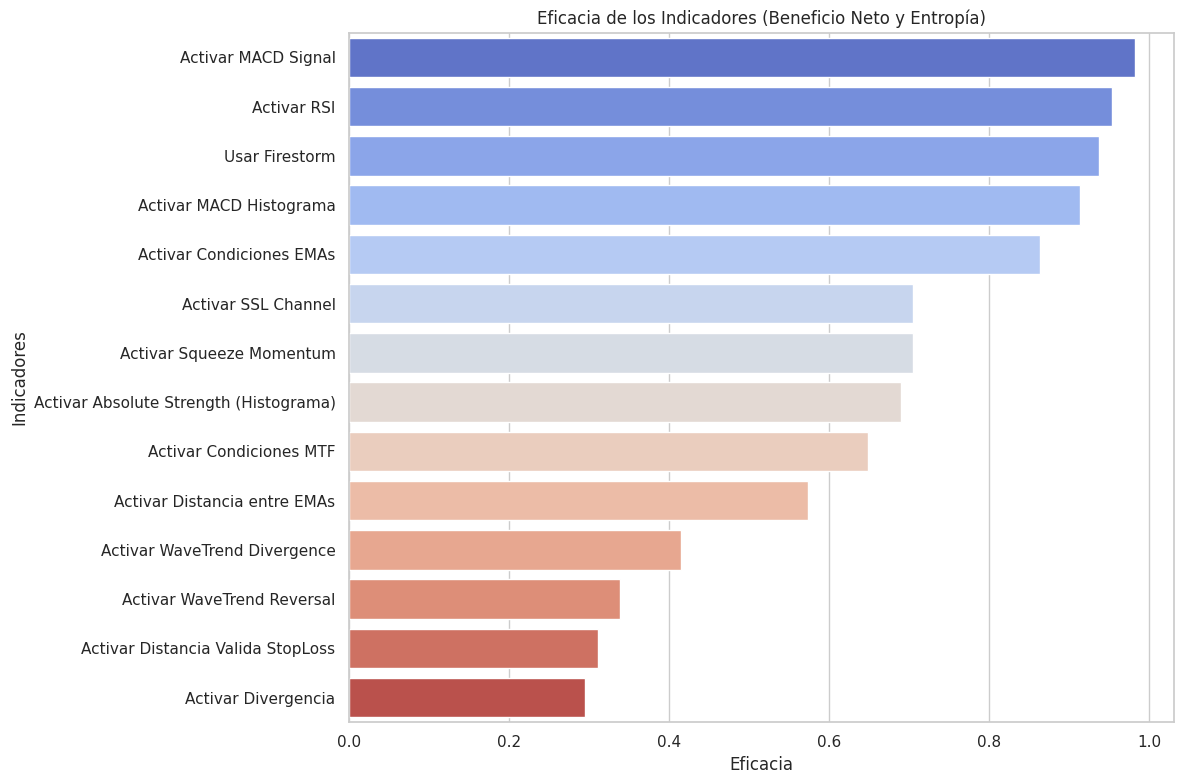

In [9]:

# 2. Calcular el Promedio de Beneficio Neto por Indicador en Estado Opcional
beneficio_promedio = {}

for indicador in indicator_columns:
    # Filtrar filas donde el indicador está en estado 'Opcional'
    df_opcional = df_valid[df_valid[indicador] == 'Opcional']
    
    # Calcular el promedio de 'Beneficio neto'
    promedio = df_opcional['Beneficio neto'].mean()
    
    # Almacenar en el diccionario
    beneficio_promedio[indicador] = promedio

# Convertir el diccionario en un DataFrame
df_beneficio_promedio = pd.DataFrame.from_dict(
    beneficio_promedio, 
    orient='index', 
    columns=['Beneficio Neto Promedio (USD)']
).sort_values(by='Beneficio Neto Promedio (USD)', ascending=False)

# 3. Calcular la Diversidad de las Combinaciones

# a. Número de Configuraciones Únicas
diversidad_combinaciones_unique = {}

for indicador in indicator_columns:
    # Filtrar filas donde el indicador está en estado 'Opcional'
    df_opcional = df_valid[df_valid[indicador] == 'Opcional'].copy()
    
    # Excluir el indicador actual
    other_indicators = [col for col in indicator_columns if col != indicador]
    
    # Crear una representación única de la configuración de los otros indicadores
    combinaciones_unicas = df_opcional[other_indicators].astype(str).agg('|'.join, axis=1)
    
    # Calcular el número de configuraciones únicas
    unique_count = combinaciones_unicas.nunique()
    
    # Almacenar en el diccionario
    diversidad_combinaciones_unique[indicador] = unique_count

# Convertir a DataFrame
df_diversidad_unique = pd.DataFrame.from_dict(
    diversidad_combinaciones_unique, 
    orient='index', 
    columns=['Número de Configuraciones Únicas']
).sort_values(by='Número de Configuraciones Únicas', ascending=False)

# b. Entropía de las Combinaciones
diversidad_combinaciones_entropy = {}

for indicador in indicator_columns:
    # Filtrar filas donde el indicador está en estado 'Opcional'
    df_opcional = df_valid[df_valid[indicador] == 'Opcional'].copy()
    
    # Excluir el indicador actual
    other_indicators = [col for col in indicator_columns if col != indicador]
    
    # Crear una representación única de la configuración de los otros indicadores
    combinaciones_unicas = df_opcional[other_indicators].astype(str).agg('|'.join, axis=1)
    
    # Calcular la frecuencia de cada configuración única
    combinacion_counts = combinaciones_unicas.value_counts()
    
    # Calcular la probabilidad de cada configuración
    prob_dist = combinacion_counts / combinacion_counts.sum()
    
    # Calcular la entropía
    entropy = -sum(prob_dist * prob_dist.apply(lambda x: log2(x) if x > 0 else 0))
    
    # Almacenar la entropía
    diversidad_combinaciones_entropy[indicador] = entropy

# Convertir a DataFrame
df_diversidad_entropy = pd.DataFrame.from_dict(
    diversidad_combinaciones_entropy, 
    orient='index', 
    columns=['Entropía Combinaciones']
).sort_values(by='Entropía Combinaciones', ascending=False)

# Normalizar la entropía para que esté en el rango [0, 1]
df_diversidad_entropy['Entropía Combinaciones (Normalizada)'] = df_diversidad_entropy['Entropía Combinaciones'] / df_diversidad_entropy['Entropía Combinaciones'].max()

# 4. Combinar Beneficio Neto Promedio y Diversidad

# a. Combinar Beneficio Neto Promedio y Número de Configuraciones Únicas
df_efficacy_unique = pd.concat([df_beneficio_promedio, df_diversidad_unique], axis=1)

# Normalizar las columnas
scaler = MinMaxScaler()
df_efficacy_unique['Beneficio Neto Promedio (Norm)'] = scaler.fit_transform(df_efficacy_unique[['Beneficio Neto Promedio (USD)']])
df_efficacy_unique['Número de Configuraciones Únicas (Norm)'] = scaler.fit_transform(df_efficacy_unique[['Número de Configuraciones Únicas']])

# Definir la eficacia como una combinación ponderada
peso_beneficio = 0.7
peso_configuraciones = 0.3

df_efficacy_unique['Eficacia'] = (peso_beneficio * df_efficacy_unique['Beneficio Neto Promedio (Norm)'] + 
                                   peso_configuraciones * df_efficacy_unique['Número de Configuraciones Únicas (Norm)'])

# Ordenar por eficacia
df_efficacy_unique = df_efficacy_unique.sort_values(by='Eficacia', ascending=False)

# Mostrar el DataFrame con la eficacia
print(df_efficacy_unique[['Beneficio Neto Promedio (USD)', 'Beneficio Neto Promedio (Norm)', 
                          'Número de Configuraciones Únicas', 'Número de Configuraciones Únicas (Norm)', 
                          'Eficacia']])

# Visualizar la Eficacia de los Indicadores
plt.figure(figsize=(12, 8))
sns.barplot(
    x='Eficacia', 
    y=df_efficacy_unique.index, 
    data=df_efficacy_unique, 
    palette='coolwarm'
)
plt.title('Eficacia de los Indicadores (Beneficio Neto y Número de Configuraciones Únicas)')
plt.xlabel('Eficacia')
plt.ylabel('Indicadores')
plt.tight_layout()
plt.show()

# b. Combinar Beneficio Neto Promedio y Entropía de las Combinaciones
df_efficacy_entropy = pd.concat([df_beneficio_promedio, df_diversidad_entropy['Entropía Combinaciones (Normalizada)']], axis=1)

# Reemplazar NaN en 'Entropía Combinaciones (Normalizada)' con 0
df_efficacy_entropy['Entropía Combinaciones (Normalizada)'].fillna(0, inplace=True)

# Normalizar las columnas
df_efficacy_entropy['Beneficio Neto Promedio (Norm)'] = scaler.fit_transform(df_efficacy_entropy[['Beneficio Neto Promedio (USD)']])
df_efficacy_entropy['Entropía Combinaciones (Norm)'] = scaler.fit_transform(df_efficacy_entropy[['Entropía Combinaciones (Normalizada)']])

# Definir la eficacia como una combinación ponderada
peso_beneficio = 0.7
peso_entropia = 0.3

df_efficacy_entropy['Eficacia'] = (peso_beneficio * df_efficacy_entropy['Beneficio Neto Promedio (Norm)'] + 
                                     peso_entropia * df_efficacy_entropy['Entropía Combinaciones (Norm)'])

# Ordenar por eficacia
df_efficacy_entropy = df_efficacy_entropy.sort_values(by='Eficacia', ascending=False)

# Mostrar el DataFrame con la eficacia
print(df_efficacy_entropy[['Beneficio Neto Promedio (USD)', 'Beneficio Neto Promedio (Norm)', 
                           'Entropía Combinaciones (Normalizada)', 'Entropía Combinaciones (Norm)', 
                           'Eficacia']])

# Visualizar la Eficacia de los Indicadores
plt.figure(figsize=(12, 8))
sns.barplot(
    x='Eficacia', 
    y=df_efficacy_entropy.index, 
    data=df_efficacy_entropy, 
    palette='coolwarm'
)
plt.title('Eficacia de los Indicadores (Beneficio Neto y Entropía)')
plt.xlabel('Eficacia')
plt.ylabel('Indicadores')
plt.tight_layout()
plt.show()


# b. Eficacia de Indicadores Excluyentes

Total de combinaciones antes del filtrado: 134200
Total de combinaciones después del filtrado: 131911


/tmp/ipykernel_37/633103813.py:37: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_valid_excluyente[indicator_columns_excluyente] = df_valid_excluyente[indicator_columns_excluyente].replace(estado_mapping_excluyente)


   Activar Absolute Strength (Histograma)  Activar SSL Channel  \
0                                     0.0                  1.0   
1                                     1.0                  1.5   
2                                     1.0                  1.0   
3                                     1.0                  1.5   
4                                     1.5                  1.0   

   Activar Condiciones MTF  Activar Squeeze Momentum  \
0                      1.0                       1.5   
1                      0.0                       1.0   
2                      1.0                       1.5   
3                      1.0                       1.0   
4                      1.0                       0.0   

   Activar Distancia entre EMAs  Activar Distancia Valida StopLoss  \
0                             1                                  1   
1                             1                                  1   
2                             1                         

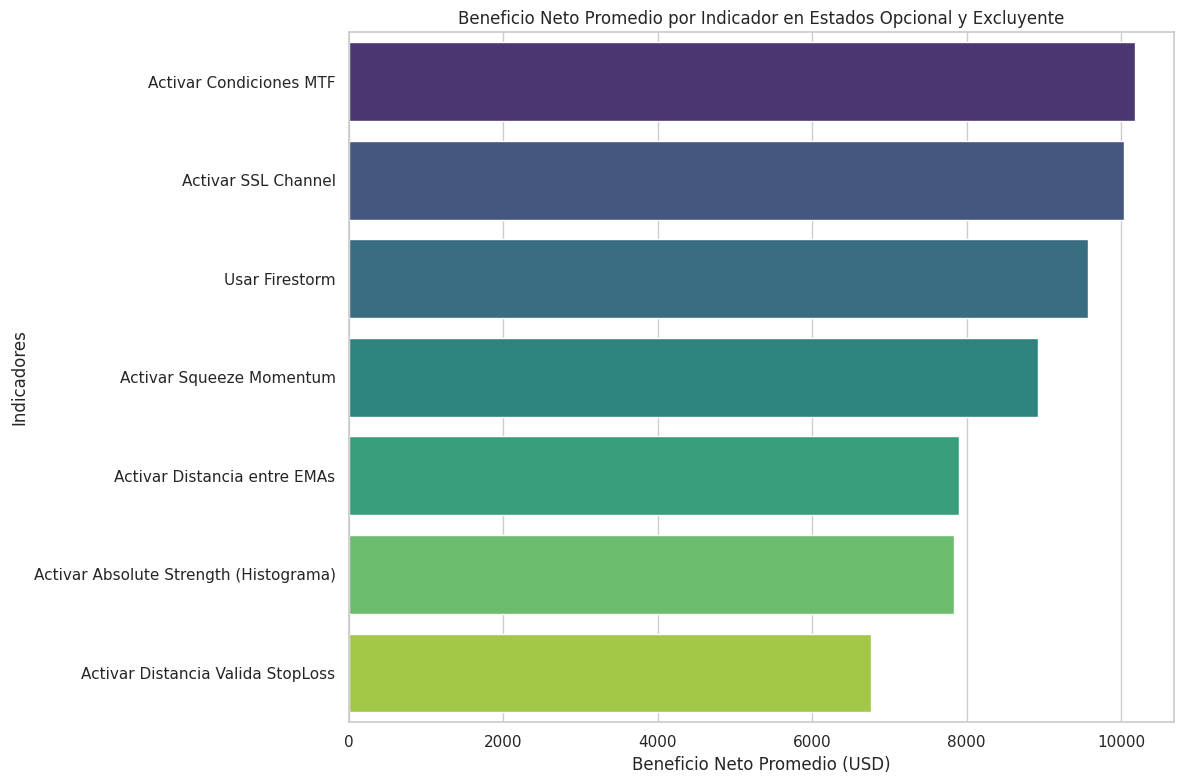

In [10]:
excluyente_indicators = [
    "Activar Absolute Strength (Histograma)",
    "Activar SSL Channel",
    "Activar Condiciones MTF",
    "Activar Squeeze Momentum",
    "Activar Distancia entre EMAs",
    "Activar Distancia Valida StopLoss",
    "Usar Firestorm"
]

estado_mapping_excluyente = {
    'Desactivado': 0,
    'Opcional': 1,
    'Excluyente': 1.5
}

# Definir las columnas de 'result'
result_columns = [
    'Beneficio neto',
    'Total operaciones cerradas',
    'Porcentaje de rentabilidad',
    'Factor de ganancias',
    'Prom. barras en operaciones'
]

# Filtrar filas donde al menos una de las columnas de 'result' es NaN
df_valid = df.dropna(subset=result_columns)

# Verificar el filtrado
print(f"Total de combinaciones antes del filtrado: {df.shape[0]}")
print(f"Total de combinaciones después del filtrado: {df_valid.shape[0]}")

# Filtrar las columnas de indicadores excluyentes
indicator_columns_excluyente = excluyente_indicators
# Asignar pesos a los estados de los indicadores excluyentes
df_valid_excluyente = df_valid.copy()
df_valid_excluyente[indicator_columns_excluyente] = df_valid_excluyente[indicator_columns_excluyente].replace(estado_mapping_excluyente)

# Verificar la conversión
print(df_valid_excluyente[indicator_columns_excluyente].head())
# Inicializar un diccionario para almacenar los promedios ponderados
beneficio_promedio_excluyente = {}

for indicador in indicator_columns_excluyente:
    # Filtrar filas donde el indicador está en estado 'Opcional' o 'Excluyente' (valor > 0)
    df_activo = df_valid_excluyente[df_valid_excluyente[indicador] > 0]
    
    # Calcular el promedio ponderado de 'Beneficio neto'
    promedio_ponderado = (df_activo['Beneficio neto'] * df_activo[indicador]).sum() / df_activo[indicador].sum()
    
    # Almacenar en el diccionario
    beneficio_promedio_excluyente[indicador] = promedio_ponderado

# Convertir el diccionario en un DataFrame
df_beneficio_promedio_excluyente = pd.DataFrame.from_dict(
    beneficio_promedio_excluyente, 
    orient='index', 
    columns=['Beneficio Neto Promedio (USD)']
).sort_values(by='Beneficio Neto Promedio (USD)', ascending=False)

# Mostrar el DataFrame resultante
print(df_beneficio_promedio_excluyente)

# Configurar el estilo de los gráficos
sns.set(style="whitegrid")

# Crear un gráfico de barras para visualizar el beneficio neto promedio
plt.figure(figsize=(12, 8))
sns.barplot(
    x='Beneficio Neto Promedio (USD)', 
    y=df_beneficio_promedio_excluyente.index, 
    data=df_beneficio_promedio_excluyente, 
    palette='viridis'
)
plt.title('Beneficio Neto Promedio por Indicador en Estados Opcional y Excluyente')
plt.xlabel('Beneficio Neto Promedio (USD)')
plt.ylabel('Indicadores')
plt.tight_layout()
plt.show()


                                        Número de Configuraciones Únicas
Activar Absolute Strength (Histograma)                               160
Activar SSL Channel                                                  160
Activar Condiciones MTF                                              160
Activar Squeeze Momentum                                             160
Activar Distancia entre EMAs                                         128
Activar Distancia Valida StopLoss                                    128
Usar Firestorm                                                       128
                                        Entropía Combinaciones  \
Activar Squeeze Momentum                              7.301676   
Activar Absolute Strength (Histograma)                7.301655   
Activar Condiciones MTF                               7.301429   
Activar SSL Channel                                   7.299578   
Usar Firestorm                                        6.986275   
Activar Distancia en

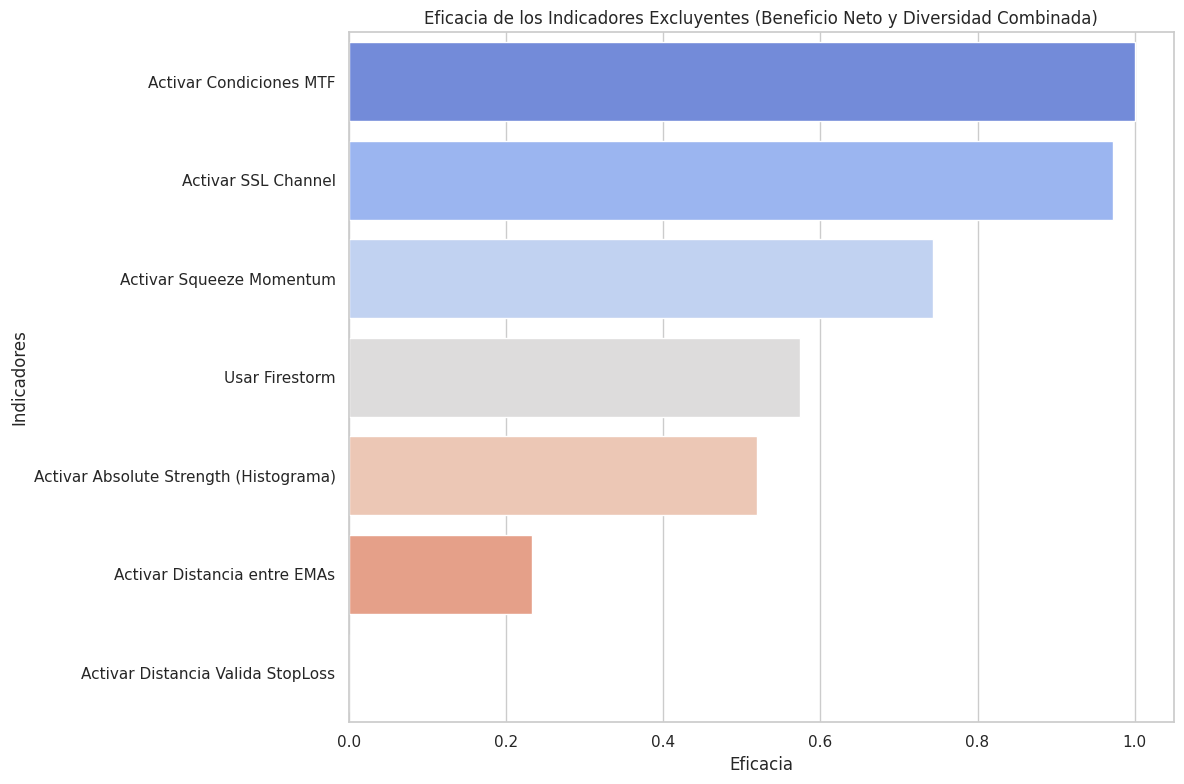

In [11]:
# Inicializar un diccionario para almacenar el número de configuraciones únicas
diversidad_combinaciones_unique_excluyente = {}

for indicador in indicator_columns_excluyente:
    # Filtrar filas donde el indicador está en estado 'Opcional' o 'Excluyente' (valor > 0)
    df_activo = df_valid_excluyente[df_valid_excluyente[indicador] > 0].copy()
    
    # Excluir el indicador actual para evaluar la diversidad de los demás
    other_indicators = [col for col in indicator_columns_excluyente if col != indicador]
    
    # Crear una representación única de la configuración de los otros indicadores
    combinaciones_unicas = df_activo[other_indicators].astype(str).agg('|'.join, axis=1)
    
    # Calcular el número de configuraciones únicas
    unique_count = combinaciones_unicas.nunique()
    
    # Almacenar en el diccionario
    diversidad_combinaciones_unique_excluyente[indicador] = unique_count

# Convertir a DataFrame
df_diversidad_unique_excluyente = pd.DataFrame.from_dict(
    diversidad_combinaciones_unique_excluyente, 
    orient='index', 
    columns=['Número de Configuraciones Únicas']
).sort_values(by='Número de Configuraciones Únicas', ascending=False)

# Mostrar el DataFrame resultante
print(df_diversidad_unique_excluyente)
# Inicializar un diccionario para almacenar la entropía
diversidad_combinaciones_entropy_excluyente = {}

for indicador in indicator_columns_excluyente:
    # Filtrar filas donde el indicador está en estado 'Opcional' o 'Excluyente' (valor > 0)
    df_activo = df_valid_excluyente[df_valid_excluyente[indicador] > 0].copy()
    
    # Excluir el indicador actual para evaluar la diversidad de los demás
    other_indicators = [col for col in indicator_columns_excluyente if col != indicador]
    
    # Crear una representación única de la configuración de los otros indicadores
    combinaciones_unicas = df_activo[other_indicators].astype(str).agg('|'.join, axis=1)
    
    # Calcular la frecuencia de cada configuración única
    combinacion_counts = combinaciones_unicas.value_counts()
    
    # Calcular la probabilidad de cada configuración
    prob_dist = combinacion_counts / combinacion_counts.sum()
    
    # Calcular la entropía
    entropy = -sum(prob_dist * prob_dist.apply(lambda x: log2(x) if x > 0 else 0))
    
    # Almacenar la entropía
    diversidad_combinaciones_entropy_excluyente[indicador] = entropy

# Convertir a DataFrame
df_diversidad_entropy_excluyente = pd.DataFrame.from_dict(
    diversidad_combinaciones_entropy_excluyente, 
    orient='index', 
    columns=['Entropía Combinaciones']
).sort_values(by='Entropía Combinaciones', ascending=False)

# Normalizar la entropía para que esté en el rango [0, 1]
df_diversidad_entropy_excluyente['Entropía Combinaciones (Normalizada)'] = df_diversidad_entropy_excluyente['Entropía Combinaciones'] / df_diversidad_entropy_excluyente['Entropía Combinaciones'].max()

# Mostrar el DataFrame resultante
print(df_diversidad_entropy_excluyente)
# Inicializar un diccionario para almacenar el índice de Simpson
diversidad_combinaciones_simpson_excluyente = {}

for indicador in indicator_columns_excluyente:
    # Filtrar filas donde el indicador está en estado 'Opcional' o 'Excluyente' (valor > 0)
    df_activo = df_valid_excluyente[df_valid_excluyente[indicador] > 0].copy()
    
    # Excluir el indicador actual para evaluar la diversidad de los demás
    other_indicators = [col for col in indicator_columns_excluyente if col != indicador]
    
    # Crear una representación única de la configuración de los otros indicadores
    combinaciones_unicas = df_activo[other_indicators].astype(str).agg('|'.join, axis=1)
    
    # Calcular la frecuencia de cada configuración única
    combinacion_counts = combinaciones_unicas.value_counts()
    
    # Calcular la probabilidad de cada configuración
    prob_dist = combinacion_counts / combinacion_counts.sum()
    
    # Calcular el índice de Simpson
    simpson = 1 - sum(prob_dist ** 2)
    
    # Almacenar el índice de Simpson
    diversidad_combinaciones_simpson_excluyente[indicador] = simpson

# Convertir a DataFrame
df_diversidad_simpson_excluyente = pd.DataFrame.from_dict(
    diversidad_combinaciones_simpson_excluyente, 
    orient='index', 
    columns=['Índice de Simpson']
).sort_values(by='Índice de Simpson', ascending=False)

# Normalizar el índice de Simpson para que esté en el rango [0, 1]
df_diversidad_simpson_excluyente['Índice de Simpson (Norm)'] = df_diversidad_simpson_excluyente['Índice de Simpson'] / df_diversidad_simpson_excluyente['Índice de Simpson'].max()

# Mostrar el DataFrame resultante
print(df_diversidad_simpson_excluyente)
# Combinar las métricas de diversidad
df_diversidad_combined_excluyente = pd.concat([
    df_diversidad_unique_excluyente['Número de Configuraciones Únicas'],
    df_diversidad_entropy_excluyente['Entropía Combinaciones (Normalizada)'],
    df_diversidad_simpson_excluyente['Índice de Simpson (Norm)']
], axis=1)

# Definir una medida de diversidad combinada, por ejemplo, el promedio
df_diversidad_combined_excluyente['Diversidad Combinada (Norm)'] = df_diversidad_combined_excluyente.mean(axis=1)

# Mostrar el DataFrame resultante
print(df_diversidad_combined_excluyente)
# Combinar los DataFrames de beneficio y diversidad
df_efficacy_excluyente = pd.concat([df_beneficio_promedio_excluyente, df_diversidad_combined_excluyente['Diversidad Combinada (Norm)']], axis=1)

# Normalizar el beneficio neto promedio y la diversidad combinada
scaler = MinMaxScaler()

df_efficacy_excluyente['Beneficio Neto Promedio (Norm)'] = scaler.fit_transform(df_efficacy_excluyente[['Beneficio Neto Promedio (USD)']])
df_efficacy_excluyente['Diversidad Combinada (Norm)'] = scaler.fit_transform(df_efficacy_excluyente[['Diversidad Combinada (Norm)']])

# Definir los pesos (ajusta según tus prioridades)
peso_beneficio = 0.7
peso_diversidad = 0.3

# Calcular la eficacia como una combinación ponderada
df_efficacy_excluyente['Eficacia'] = (peso_beneficio * df_efficacy_excluyente['Beneficio Neto Promedio (Norm)'] + 
                                       peso_diversidad * df_efficacy_excluyente['Diversidad Combinada (Norm)'])

# Ordenar por eficacia
df_efficacy_excluyente = df_efficacy_excluyente.sort_values(by='Eficacia', ascending=False)

# Mostrar el DataFrame con la eficacia
print(df_efficacy_excluyente[['Beneficio Neto Promedio (USD)', 'Beneficio Neto Promedio (Norm)', 
                              'Diversidad Combinada (Norm)', 'Eficacia']])
# Crear un gráfico de barras para visualizar la eficacia
plt.figure(figsize=(12, 8))
sns.barplot(
    x='Eficacia', 
    y=df_efficacy_excluyente.index, 
    data=df_efficacy_excluyente, 
    palette='coolwarm'
)
plt.title('Eficacia de los Indicadores Excluyentes (Beneficio Neto y Diversidad Combinada)')
plt.xlabel('Eficacia')
plt.ylabel('Indicadores')
plt.tight_layout()
plt.show()


                                Beneficio Neto Promedio (Norm)  \
Beneficio Neto Promedio (Norm)                        1.000000   
Diversidad Combinada (Norm)                           0.485699   
Eficacia                                              0.925040   

                                Diversidad Combinada (Norm)  Eficacia  
Beneficio Neto Promedio (Norm)                     0.485699  0.925040  
Diversidad Combinada (Norm)                        1.000000  0.781346  
Eficacia                                           0.781346  1.000000  


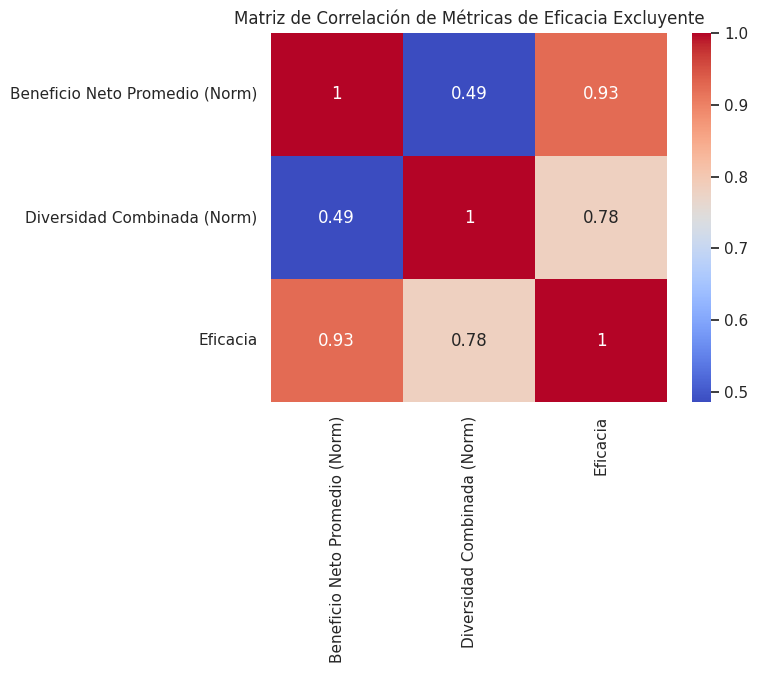

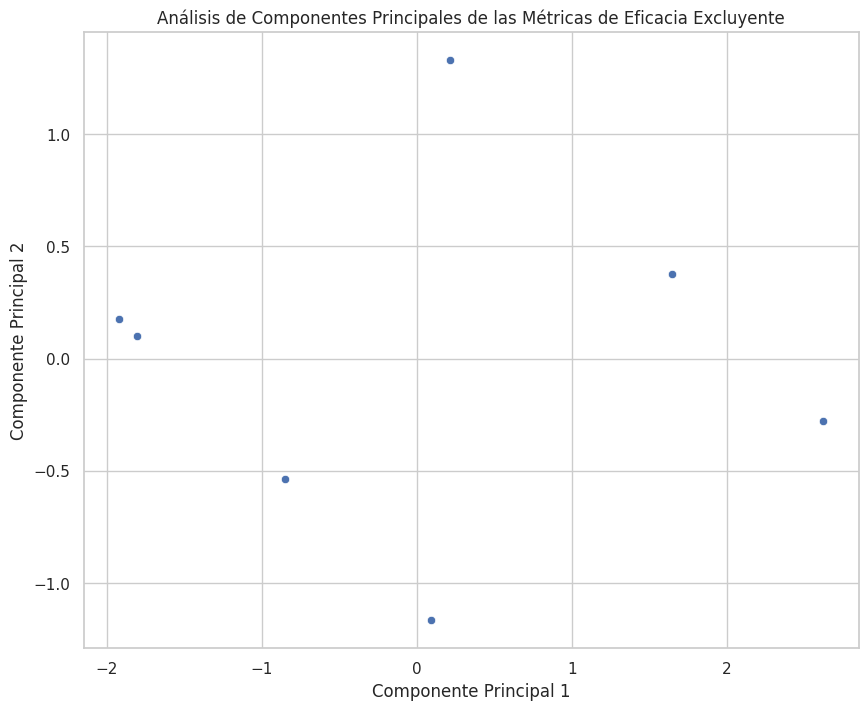

/opt/conda/lib/python3.10/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


                            OLS Regression Results                            
Dep. Variable:               Eficacia   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.970e+30
Date:                Wed, 23 Oct 2024   Prob (F-statistic):           4.53e-61
Time:                        18:46:48   Log-Likelihood:                 240.74
No. Observations:                   7   AIC:                            -475.5
Df Residuals:                       4   BIC:                            -475.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

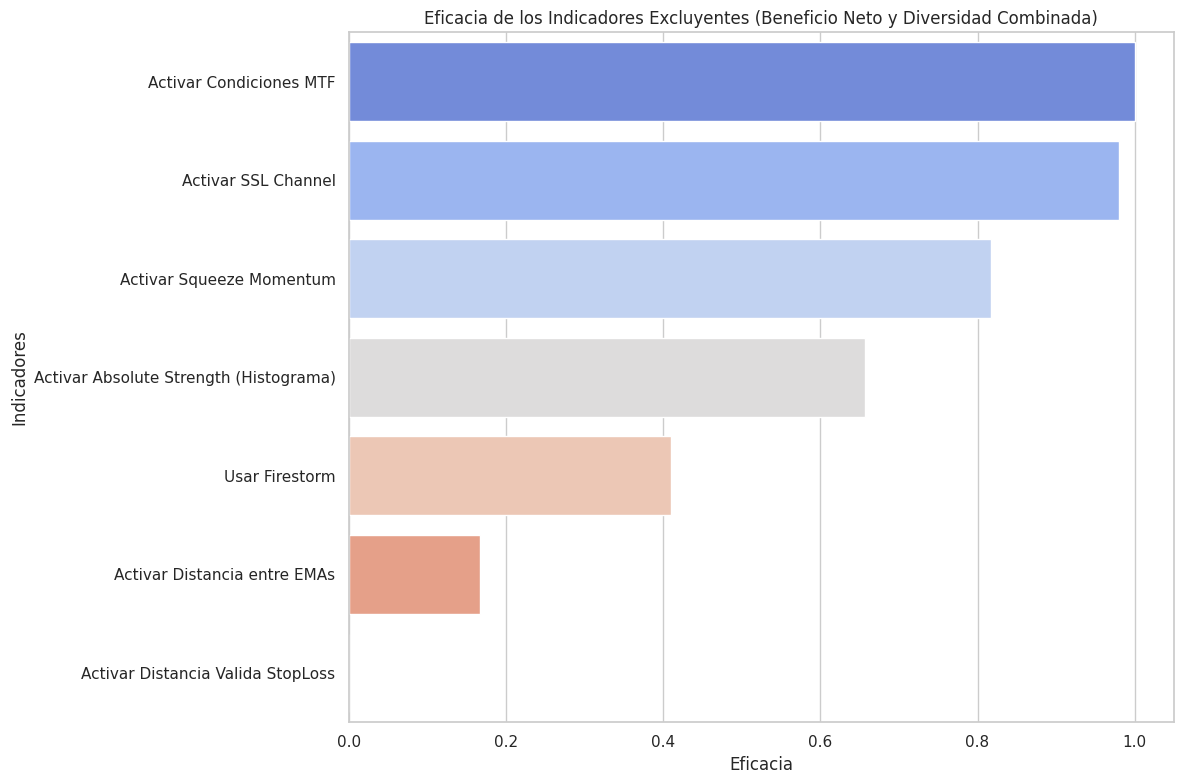

In [12]:
# Calcular la matriz de correlación
corr_matrix_excluyente = df_efficacy_excluyente[['Beneficio Neto Promedio (Norm)', 
                                                'Diversidad Combinada (Norm)', 
                                                'Eficacia']].corr()
print(corr_matrix_excluyente)

# Visualizar la matriz de correlación
sns.heatmap(corr_matrix_excluyente, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación de Métricas de Eficacia Excluyente')
plt.show()
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Seleccionar las métricas de eficacia combinadas
metrics_combined_excluyente = df_efficacy_excluyente[['Beneficio Neto Promedio (Norm)', 'Diversidad Combinada (Norm)', 'Eficacia']]

# Escalar las métricas
scaler_pca = StandardScaler()
metrics_scaled_combined_excluyente = scaler_pca.fit_transform(metrics_combined_excluyente)

# Aplicar PCA
pca_excluyente = PCA(n_components=2)
principal_components_excluyente = pca_excluyente.fit_transform(metrics_scaled_combined_excluyente)

# Crear un DataFrame con los componentes principales
df_pca_excluyente = pd.DataFrame(data=principal_components_excluyente, columns=['PC1', 'PC2'], index=df_efficacy_excluyente.index)

# Visualizar los resultados de PCA
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', data=df_pca_excluyente)
plt.title('Análisis de Componentes Principales de las Métricas de Eficacia Excluyente')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()
import statsmodels.api as sm

# Definir las variables independientes y dependiente
X_excluyente = df_efficacy_excluyente[['Beneficio Neto Promedio (Norm)', 'Diversidad Combinada (Norm)']]
y_excluyente = df_efficacy_excluyente['Eficacia']

# Añadir una constante
X_excluyente = sm.add_constant(X_excluyente)

# Ajustar el modelo
model_excluyente = sm.OLS(y_excluyente, X_excluyente).fit()

# Resumen del modelo
print(model_excluyente.summary())
# Definir nuevos pesos, por ejemplo, 0.5 para beneficio y 0.5 para diversidad
peso_beneficio = 0.5
peso_diversidad = 0.5

# Calcular la eficacia con nuevos pesos
df_efficacy_excluyente['Eficacia'] = (peso_beneficio * df_efficacy_excluyente['Beneficio Neto Promedio (Norm)'] + 
                                       peso_diversidad * df_efficacy_excluyente['Diversidad Combinada (Norm)'])

# Ordenar por eficacia
df_efficacy_excluyente = df_efficacy_excluyente.sort_values(by='Eficacia', ascending=False)

# Mostrar el DataFrame con la eficacia
print(df_efficacy_excluyente[['Beneficio Neto Promedio (USD)', 'Beneficio Neto Promedio (Norm)', 
                              'Diversidad Combinada (Norm)', 'Eficacia']])

# Visualizar la Eficacia de los Indicadores con nuevos pesos
plt.figure(figsize=(12, 8))
sns.barplot(
    x='Eficacia', 
    y=df_efficacy_excluyente.index, 
    data=df_efficacy_excluyente, 
    palette='coolwarm'
)
plt.title('Eficacia de los Indicadores Excluyentes (Beneficio Neto y Diversidad Combinada)')
plt.xlabel('Eficacia')
plt.ylabel('Indicadores')
plt.tight_layout()
plt.show()


# Resultados de las 130Mil combinaciones

# a. Calcular la Diversidad de Cada Combinación


***i. Mapeo de Estados a Valores Numéricos***

***ii. Calcular la Entropía para Cada Combinación***

In [13]:
# Definir las columnas de interés
metric_columns = [
    'Beneficio neto',
    'Factor de ganancias',
    'Total operaciones cerradas',
    'Porcentaje de rentabilidad',
    'Prom. barras en operaciones'
]

# Calcular las medianas
medianas = df[metric_columns].median()

# Mostrar las medianas
print("Medianas de las Métricas Clave:")
print(medianas)
from math import log2

# Definir los indicadores excluyentes
excluyente_indicators = [
    "Activar Absolute Strength (Histograma)",
    "Activar SSL Channel",
    "Activar Condiciones MTF",
    "Activar Squeeze Momentum",
    "Activar Distancia entre EMAs",
    "Activar Distancia Valida StopLoss",
    "Usar Firestorm"
]

# Definir el mapeo de estados a valores numéricos con pesos
estado_mapping_excluyente = {
    'Desactivado': 0,
    'Opcional': 1,
    'Excluyente': 1.5
}

# Asignar pesos a los estados de los indicadores excluyentes
df_excluyente = df[excluyente_indicators].replace(estado_mapping_excluyente)

# Verificar la conversión
print(df_excluyente.head())
import numpy as np

# Definir una función para calcular la entropía
def calcular_entropia(row):
    # Contar la frecuencia de cada valor en la fila
    counts = row.value_counts()
    probabilities = counts / len(row)
    # Calcular la entropía
    entropia = -np.sum(probabilities * np.log2(probabilities + 1e-9))  # Agregar una pequeña constante para evitar log(0)
    return entropia

# Aplicar la función a cada fila
df['Entropia'] = df_excluyente.apply(calcular_entropia, axis=1)

# Verificar
print(df[['Entropia']].head())


Medianas de las Métricas Clave:
Beneficio neto                 7079.35
Factor de ganancias               1.40
Total operaciones cerradas       82.00
Porcentaje de rentabilidad       56.21
Prom. barras en operaciones      12.00
dtype: float64


/tmp/ipykernel_37/3158701967.py:37: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_excluyente = df[excluyente_indicators].replace(estado_mapping_excluyente)


   Activar Absolute Strength (Histograma)  Activar SSL Channel  \
0                                     0.0                  1.0   
1                                     1.0                  1.5   
2                                     1.0                  1.0   
3                                     1.0                  1.5   
4                                     1.5                  1.0   

   Activar Condiciones MTF  Activar Squeeze Momentum  \
0                      1.0                       1.5   
1                      0.0                       1.0   
2                      1.0                       1.5   
3                      1.0                       1.0   
4                      1.0                       0.0   

   Activar Distancia entre EMAs  Activar Distancia Valida StopLoss  \
0                             1                                  1   
1                             1                                  1   
2                             1                         

# *b. Seleccionar el 1% de las Combinaciones con Mayor Beneficio Neto*

# c. Seleccionar las 100 Combinaciones con Mayor Diversidad dentro del Top 1%


In [14]:
# Determinar el número total de combinaciones
total_combinaciones = len(df)

# Calcular el número de combinaciones que representan el 1%
n_top = int(0.01 * total_combinaciones)

# Seleccionar las top combinaciones por 'Beneficio neto'
df_top1_beneficio = df.nlargest(n_top, 'Beneficio neto').copy()

# Verificar
print(f"Top 1% de {n_top} combinaciones seleccionadas.")
print(df_top1_beneficio[['Beneficio neto', 'Entropia']].head())
# Seleccionar las top 100 combinaciones con mayor diversidad
df_top100_diversidad = df_top1_beneficio.nlargest(100, 'Entropia').copy()

# Verificar
print("Top 100 combinaciones con mayor diversidad dentro del Top 1% de Beneficio Neto:")
print(df_top100_diversidad[['Beneficio neto', 'Entropia']].head())


Top 1% de 1342 combinaciones seleccionadas.
        Beneficio neto  Entropia
106728        44541.11  1.448816
113762        43546.35  1.378783
117354        43473.27  1.448816
106729        42751.70  1.448816
106731        42313.24  1.448816
Top 100 combinaciones con mayor diversidad dentro del Top 1% de Beneficio Neto:
        Beneficio neto  Entropia
106728        44541.11  1.448816
117354        43473.27  1.448816
106729        42751.70  1.448816
106731        42313.24  1.448816
97020         42225.25  1.448816


***i. Distribución del Beneficio Neto en el Top 1%***

***ii. Distribución de la Entropía en el Top 1%***

***iii. Gráfico de Barras de las Top 100 Combinaciones por Diversidad***

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


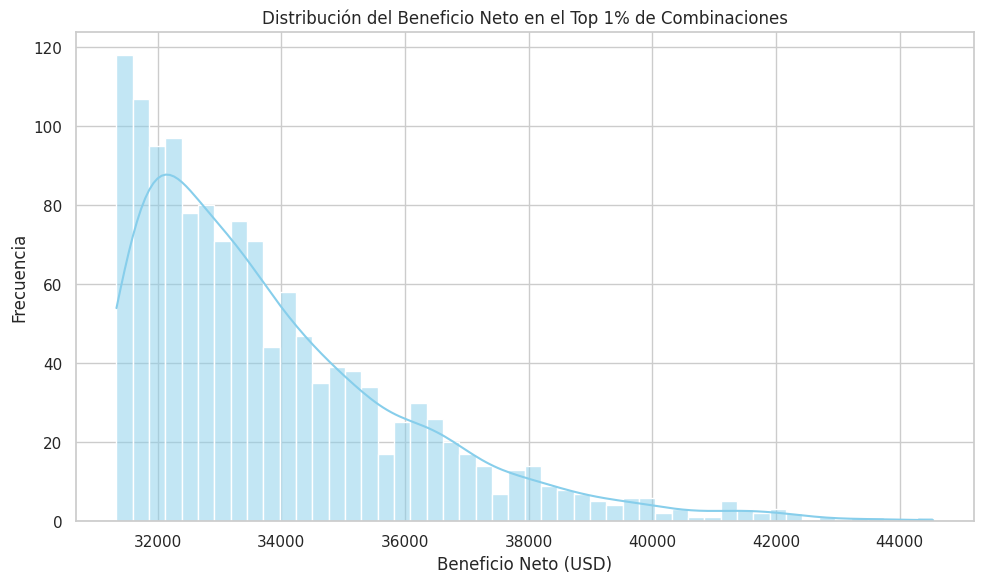

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


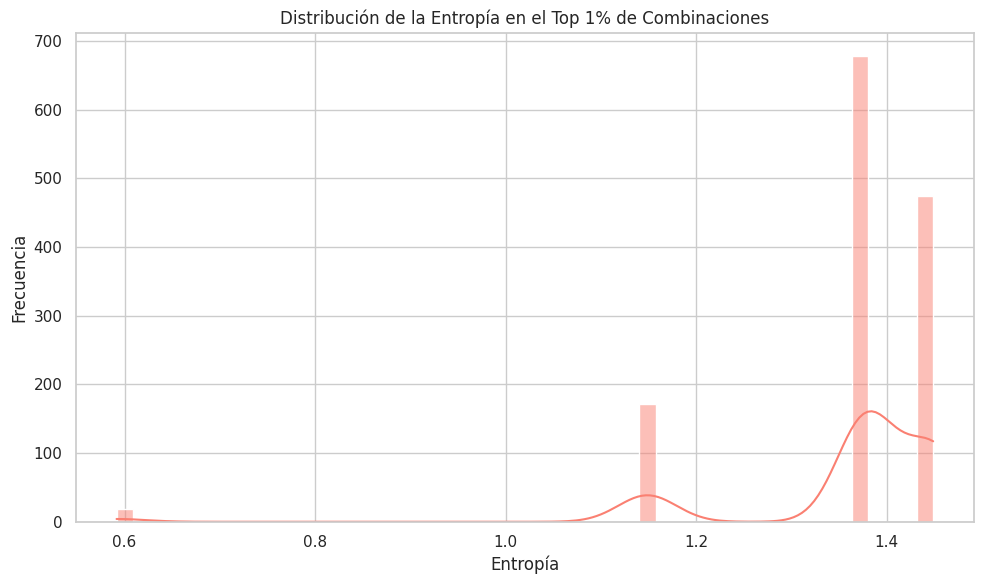

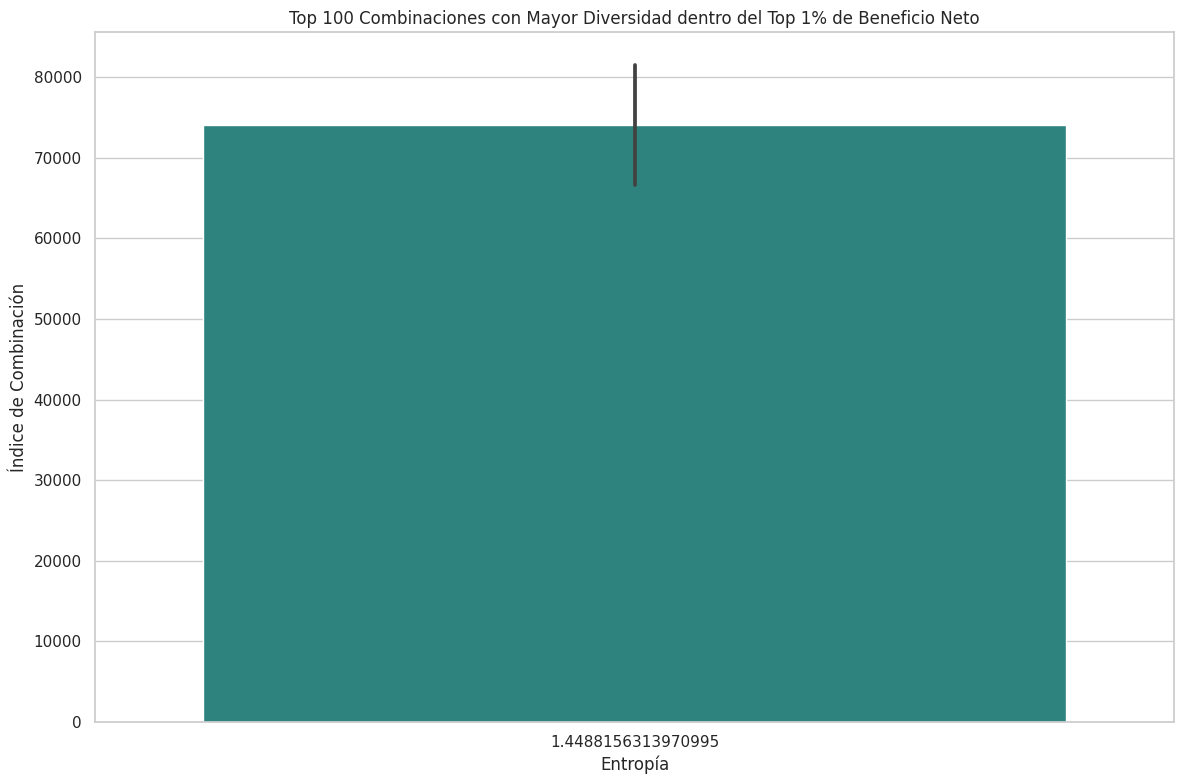

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(df_top1_beneficio['Beneficio neto'], bins=50, kde=True, color='skyblue')
plt.title('Distribución del Beneficio Neto en el Top 1% de Combinaciones')
plt.xlabel('Beneficio Neto (USD)')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()
plt.figure(figsize=(10, 6))
sns.histplot(df_top1_beneficio['Entropia'], bins=50, kde=True, color='salmon')
plt.title('Distribución de la Entropía en el Top 1% de Combinaciones')
plt.xlabel('Entropía')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()
# Ordenar las combinaciones por entropía descendente
df_top100_diversidad_sorted = df_top100_diversidad.sort_values(by='Entropia', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(
    x='Entropia',
    y=df_top100_diversidad_sorted.index,
    data=df_top100_diversidad_sorted,
    palette='viridis'
)
plt.title('Top 100 Combinaciones con Mayor Diversidad dentro del Top 1% de Beneficio Neto')
plt.xlabel('Entropía')
plt.ylabel('Índice de Combinación')
plt.tight_layout()
plt.show()


In [16]:
import pandas as pd
from IPython.display import display

# Supongamos que ya tienes el DataFrame df_top1_beneficio con el top 1% de combinaciones

# 1. Seleccionar las top 100 combinaciones con mayor entropía
df_top100_diversidad = df_top1_beneficio.nlargest(100, 'Entropia').copy()

# 2. Definir las columnas de resultados
result_columns = [
    'Beneficio neto',
    'Factor de ganancias',
    'Total operaciones cerradas',
    'Porcentaje de rentabilidad',
    'Prom. barras en operaciones'
]

# 3. Definir las columnas a mostrar, incluyendo 'name' y 'Entropia'
columns_to_show = ['name'] + result_columns + ['Entropia']

# 4. Verificar que todas las columnas existen en el DataFrame
missing_columns = [col for col in columns_to_show if col not in df_top100_diversidad.columns]
if missing_columns:
    print(f"Advertencia: Las siguientes columnas no existen en el DataFrame: {missing_columns}")

# 5. Configurar pandas para mostrar todas las columnas (Opcional)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)  # Ajusta según sea necesario

# 6. Mostrar las 100 combinaciones con las columnas seleccionadas
display(df_top100_diversidad[columns_to_show])

# 7. Restablecer las opciones de visualización (Opcional)
# pd.reset_option('display.max_columns')
# pd.reset_option('display.max_rows')

,name,Beneficio neto,Factor de ganancias,Total operaciones cerradas,Porcentaje de rentabilidad,Prom. barras en operaciones,Entropia
106728,combination_75273,44541.11,6.238,109.0,64.22,15.0,1.448816
117354,combination_84837,43473.27,5.942,116.0,62.93,14.0,1.448816
106729,combination_75274,42751.70,5.037,93.0,67.74,17.0,1.448816
106731,combination_75276,42313.24,5.970,109.0,64.22,15.0,1.448816
97020,combination_66536,42225.25,4.726,177.0,61.02,9.0,1.448816
117355,combination_84838,42048.80,4.866,96.0,67.71,16.0,1.448816
132254,combination_98247,42034.54,5.466,113.0,61.06,13.0,1.448816
57235,combination_30729,41834.29,5.230,114.0,62.28,13.0,1.448816
36866,combination_133178,41774.21,4.791,163.0,61.96,9.0,1.448816
86462,combination_57033,41609.84,5.260,110.0,64.55,13.0,1.448816


# Analisis Risk Magement


In [28]:
# Definir las columnas de Risk Management
risk_columns = [
    'Multiplier for Take Profit',
    'Porcentaje de toma de ganancias'
]
# Calcular estadísticas descriptivas
estadisticas_risk = df[risk_columns].describe()

# Mostrar las estadísticas
print("Estadísticas Descriptivas de las Columnas de Risk Management:")
print(estadisticas_risk)


Estadísticas Descriptivas de las Columnas de Risk Management:
       Multiplier for Take Profit  Porcentaje de toma de ganancias
count               134199.000000                    134199.000000
mean                     0.449999                        29.999888
std                      0.081650                         5.000019
min                      0.350000                        25.000000
25%                      0.350000                        25.000000
50%                      0.450000                        25.000000
75%                      0.550000                        35.000000
max                      0.550000                        35.000000


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


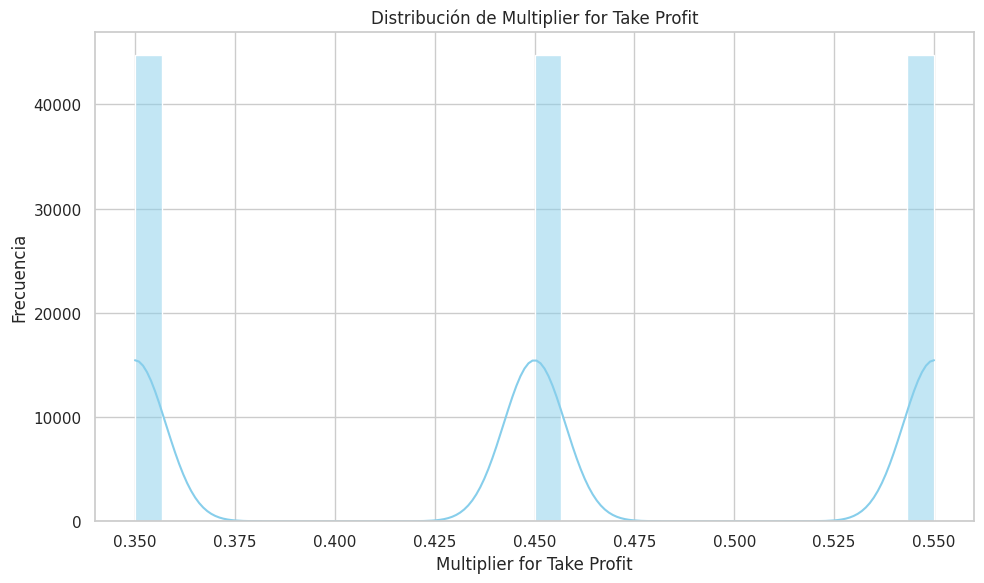

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


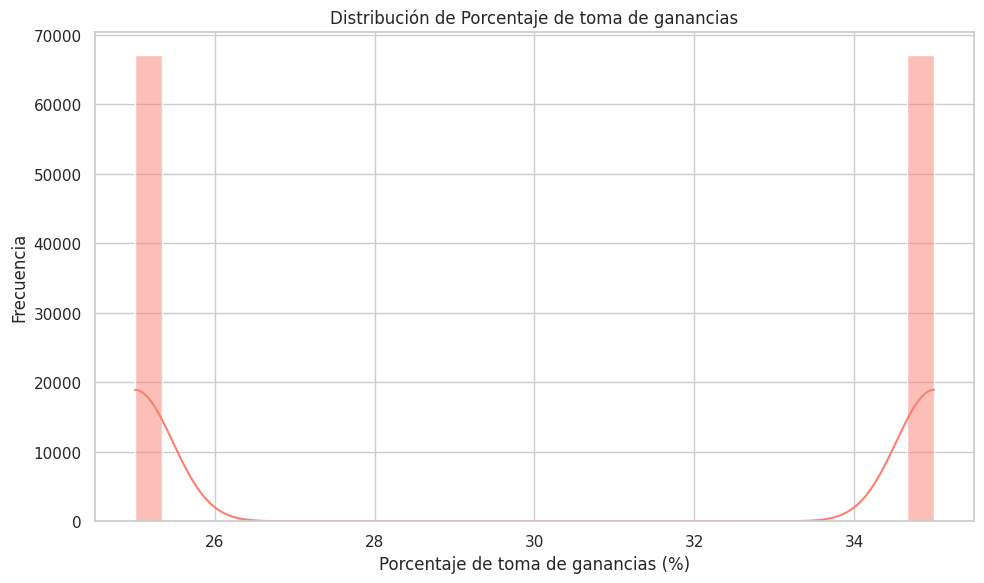

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(df['Multiplier for Take Profit'], bins=30, kde=True, color='skyblue')
plt.title('Distribución de Multiplier for Take Profit')
plt.xlabel('Multiplier for Take Profit')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()
plt.figure(figsize=(10, 6))
sns.histplot(df['Porcentaje de toma de ganancias'], bins=30, kde=True, color='salmon')
plt.title('Distribución de Porcentaje de toma de ganancias')
plt.xlabel('Porcentaje de toma de ganancias (%)')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()


In [31]:
from math import log2
import numpy as np

def calcular_entropia(grupo):
    """
    Calcula la entropía de una serie de combinaciones.
    """
    counts = grupo.value_counts()
    probabilities = counts / counts.sum()
    entropia = -np.sum(probabilities * np.log2(probabilities + 1e-9))  # Agregar pequeña constante para evitar log(0)
    return entropia


In [32]:
# Combinar las dos columnas en una sola representación para calcular la entropía
combinaciones = df[risk_columns].astype(str).agg('|'.join, axis=1)

# Calcular la entropía de todas las combinaciones
entropia_global = calcular_entropia(combinaciones)
print(f"Entropía Global de las Combinaciones de Risk Management: {entropia_global:.4f}")


Entropía Global de las Combinaciones de Risk Management: 2.5850


In [33]:
# Determinar el número total de combinaciones
total_combinaciones = len(df)

# Calcular el número de combinaciones que representan el 1%
n_top = int(0.01 * total_combinaciones)

# Seleccionar las top 1% combinaciones por 'Beneficio neto'
df_top1_beneficio = df.nlargest(n_top, 'Beneficio neto').copy()

# Verificar
print(f"Top 1% de {n_top} combinaciones seleccionadas.")
print(df_top1_beneficio[['name', 'Beneficio neto']].head())


Top 1% de 1341 combinaciones seleccionadas.
                     name  Beneficio neto
31673  combination_128504        37408.99
32636  combination_129371        29017.21
32633  combination_129369        28125.25
15241  combination_113715        27986.26
32637  combination_129372        27897.76


In [34]:
# Crear una representación única de cada combinación
df_top1_beneficio['Combinacion'] = df_top1_beneficio[risk_columns].astype(str).agg('|'.join, axis=1)

# Calcular la frecuencia de cada combinación
combinacion_counts_top1 = df_top1_beneficio['Combinacion'].value_counts()

# Calcular la probabilidad de cada combinación
prob_dist_top1 = combinacion_counts_top1 / combinacion_counts_top1.sum()

# Calcular la entropía del Top 1%
entropia_top1 = -np.sum(prob_dist_top1 * np.log2(prob_dist_top1 + 1e-9))
print(f"Entropía de las Combinaciones en el Top 1% de Beneficio Neto: {entropia_top1:.4f}")


Entropía de las Combinaciones en el Top 1% de Beneficio Neto: 2.1754


In [35]:
# Ordenar las combinaciones por frecuencia ascendente (menos frecuentes primero)
df_top1_beneficio_sorted = df_top1_beneficio.sort_values(by='Combinacion', key=lambda x: x.map(combinacion_counts_top1)).copy()

# Seleccionar las primeras 100 combinaciones
df_top100_diversidad = df_top1_beneficio_sorted.head(100).copy()

# Verificar
print("Top 100 combinaciones con mayor diversidad dentro del Top 1% de Beneficio Neto:")
print(df_top100_diversidad[['name', 'Beneficio neto', 'Multiplier for Take Profit', 'Porcentaje de toma de ganancias']].head())


Top 100 combinaciones con mayor diversidad dentro del Top 1% de Beneficio Neto:
                     name  Beneficio neto  Multiplier for Take Profit  \
68147    combination_4055        20034.30                        0.35   
54617   combination_28373        21089.09                        0.35   
7346    combination_10661        20670.89                        0.35   
32095  combination_128885        20587.61                        0.35   
90931   combination_61055        20537.85                        0.35   

       Porcentaje de toma de ganancias  
68147                               35  
54617                               35  
7346                                35  
32095                               35  
90931                               35  


,name,Beneficio neto,Multiplier for Take Profit,Porcentaje de toma de ganancias
68147,combination_4055,20034.30,0.35,35
54617,combination_28373,21089.09,0.35,35
7346,combination_10661,20670.89,0.35,35
32095,combination_128885,20587.61,0.35,35
90931,combination_61055,20537.85,0.35,35
115923,combination_83549,20185.00,0.35,35
11970,combination_110771,18571.10,0.35,35
32029,combination_128825,19580.80,0.35,35
29696,combination_126725,19548.45,0.35,35
62031,combination_35045,19456.81,0.35,35


RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

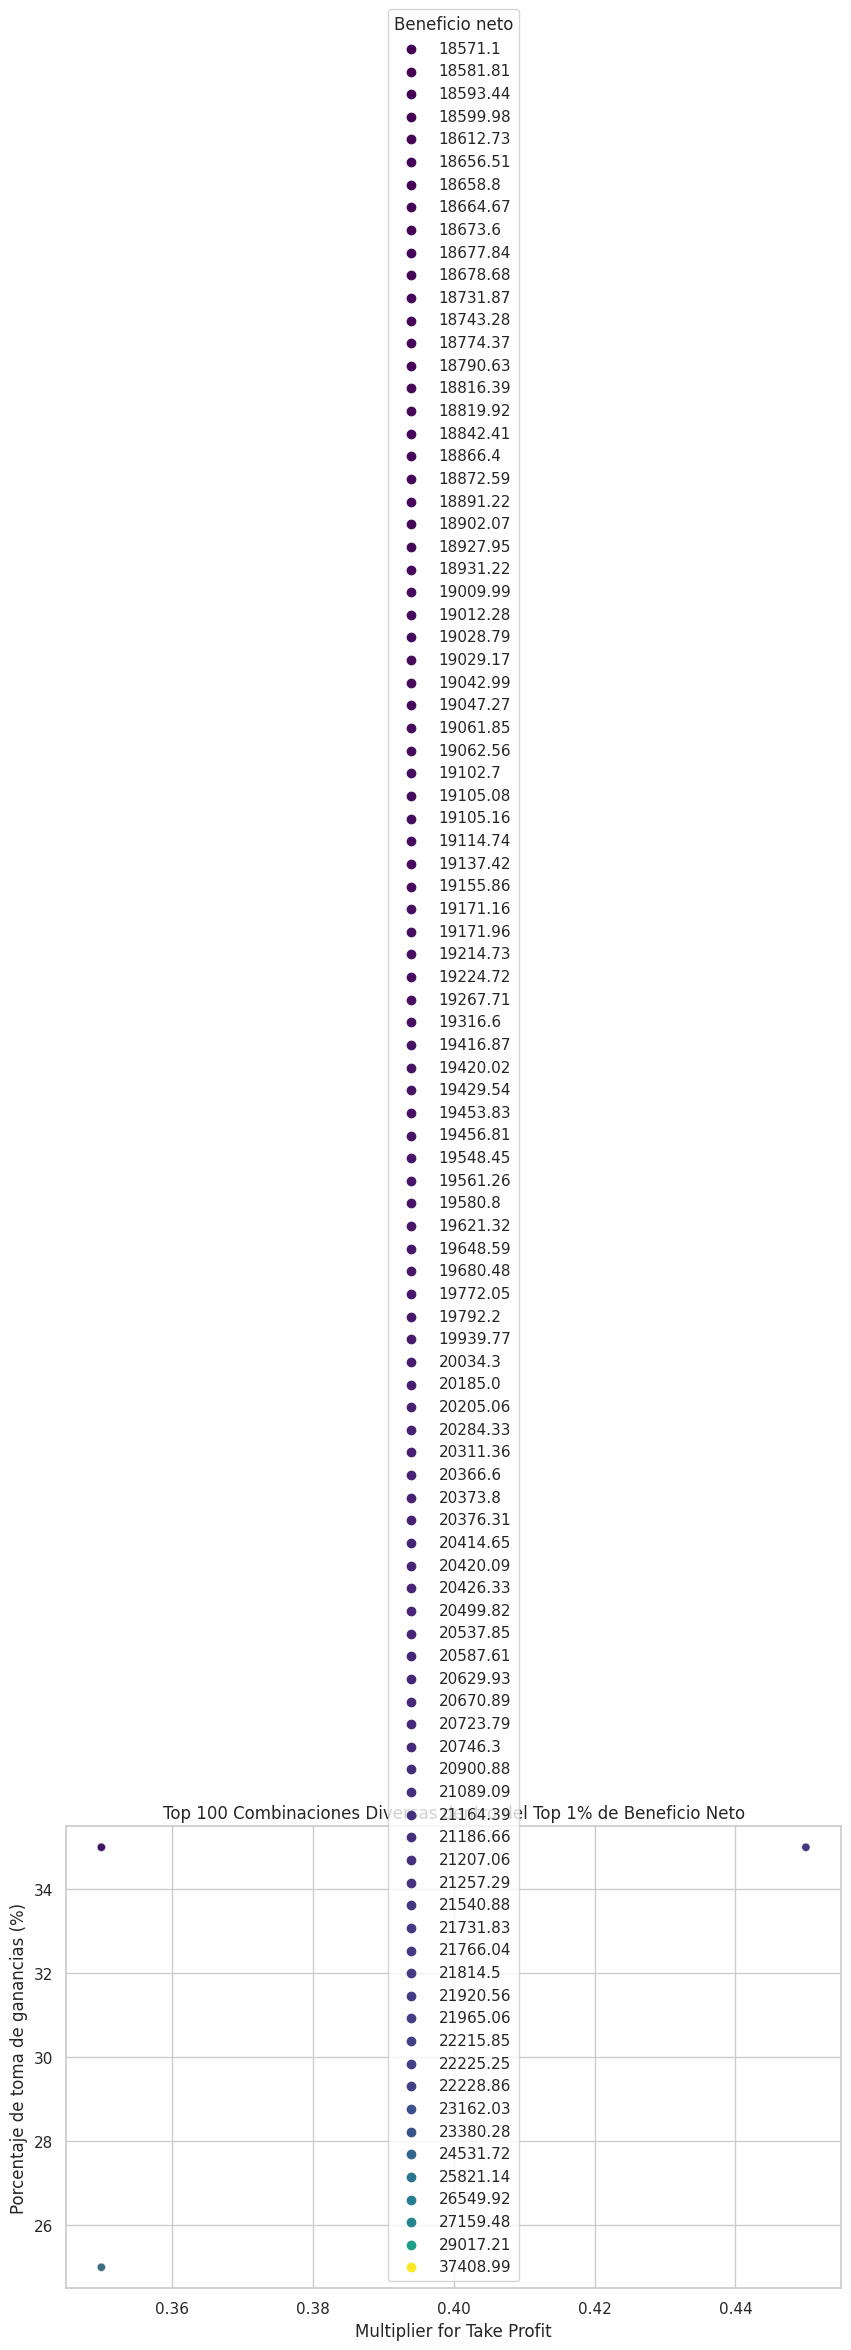

In [36]:
from IPython.display import display

# Definir las columnas a mostrar
columns_to_show_risk = ['name', 'Beneficio neto', 'Multiplier for Take Profit', 'Porcentaje de toma de ganancias']

# Configurar pandas para mostrar todas las columnas sin truncar
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Mostrar el DataFrame
display(df_top100_diversidad[columns_to_show_risk])
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Multiplier for Take Profit',
    y='Porcentaje de toma de ganancias',
    data=df_top100_diversidad,
    hue='Beneficio neto',
    palette='viridis',
    legend='full',
    alpha=0.7
)
plt.title('Top 100 Combinaciones Diversas dentro del Top 1% de Beneficio Neto')
plt.xlabel('Multiplier for Take Profit')
plt.ylabel('Porcentaje de toma de ganancias (%)')
plt.colorbar(label='Beneficio neto (USD)')
plt.tight_layout()
plt.show()
